<a href="https://colab.research.google.com/github/naiomyk/IP_WEEK_4/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_02_Naomi_Kosgei_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing our Libraries

In [3]:
Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


Reading the Dataset from our CSV file

In [4]:

# Let's read the data from the CSV file and create the dataframe to be used

df_url = "http://bit.ly/autolib_dataset]"
df = pd.read_csv(df_url)
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


Accessing Information about our Dataset

In [5]:
# Getting to know more about the dataset by accessing its information
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

DATA CLEANING

Validity

In [6]:
# Irrelevant data are those that are not actually needed, and don’t fit under 
# the context of the problem we’re trying to solve. 
#dropping unnecessary columns
df.drop(['Cars', 'Charge Slots', 'Charging Status', 'Displayed comment', 'Geo point', 'Public name', 'Rental status', 'Scheduled at', 'Station type', 'Subscription status'], axis = 1, inplace = True)
df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,2,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


In [48]:
#Using the str.strip function on the column to strip the leading and trailing spaces
df.columns = df.columns.str.strip()
df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,2,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


Checking for outliers

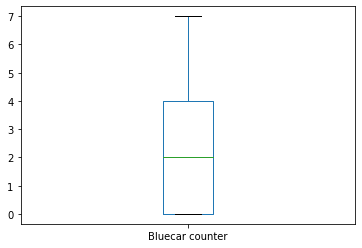

In [8]:
# Creating a box plot of the variable 'Bluecar counter'
df.boxplot(column =['Bluecar counter'], grid = False)

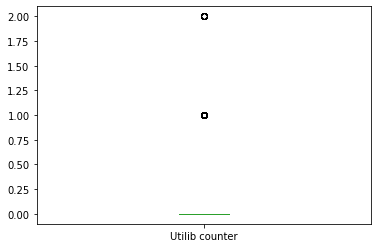

In [9]:
# Creating a box plot of the variable 'Utilib counter'
df.boxplot(column =['Utilib counter'], grid = False)

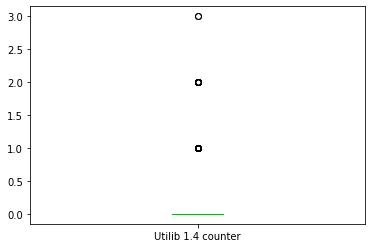

In [10]:
# Creating a box plot of the variable 'Utilib 1.4 counter'
df.boxplot(column =['Utilib 1.4 counter'], grid = False)

Dropping the outliers in Utilib counter and Utilib 1.4 counter

In [11]:
# IQR Score 
# ---
# The IQR score uses the IQR scores to remove the outliers. 
# The rule of thumb is that anything not in the range of 
# (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
# ---
# Something to note about outlier methods is that they are likely to yield 
# different results due to the fact that they use different techniques (criteria) 
# for outlier detection

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df_out.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(4210, 15)
(5000, 15)


Completeness

In [136]:
# Checking if there is any missing value in dataframe as a whole
df_out.isnull()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
# quick check to see if we have any missing values at all
print(df_out.isnull().values.any())

False


In [137]:
# Dropping Missing Values
clean_df = df_out.dropna()
(clean_df)

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


Consistency

In [94]:
# Identifying which observations are duplicates
# Dropping the duplicates

clean_df.duplicated
clean_df.drop_duplicates()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


Uniformity

In [138]:
# Standardization - Fixing messy column names
clean_df.columns = clean_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(clean_df)

                                 address  bluecar_counter  ...  hour  minute
0                    2 Avenue de Suffren                0  ...    11      43
1              145 Rue Raymond Losserand                6  ...     7      24
4     6 avenue de la Porte de Champerret                3  ...    17      23
5                   8 Boulevard Voltaire                0  ...     7       2
6                         37 rue Leblanc                0  ...    18      20
...                                  ...              ...  ...   ...     ...
4995                 8 avenue MÃ©nelotte                2  ...    11      26
4996                   37 rue de Dantzig                4  ...    16      56
4997                      142 rue du Bac                1  ...     7       1
4998         2 avenue du Val de Fontenay                2  ...    17      27
4999                 5 Rue Henry Brisson                4  ...    10       2

[4210 rows x 15 columns]


In [96]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   address             4210 non-null   object
 1   bluecar_counter     4210 non-null   int64 
 2   utilib_counter      4210 non-null   int64 
 3   utilib_1.4_counter  4210 non-null   int64 
 4   city                4210 non-null   object
 5   id                  4210 non-null   object
 6   kind                4210 non-null   object
 7   postal_code         4210 non-null   int64 
 8   slots               4210 non-null   int64 
 9   status              4210 non-null   object
 10  year                4210 non-null   int64 
 11  month               4210 non-null   int64 
 12  day                 4210 non-null   int64 
 13  hour                4210 non-null   int64 
 14  minute              4210 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 526.2+ KB


DATA PREPARATION

In [139]:
#merging the columns of date and time to one column

clean_df['datetime'] = pd.to_datetime(clean_df[['year',	'month', 'day',	'hour',	'minute']])
clean_df.head()

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,slots,status,year,month,day,hour,minute,datetime
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24,2018-04-06 07:24:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2,2018-04-06 07:02:00
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20,2018-04-08 18:20:00


In [140]:
clean_df.drop(['year', 'month', 'day', 'minute'], axis = 1, inplace = True)
clean_df.head()

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,slots,status,hour,datetime
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00


In [141]:
# To find the discrete difference 
clean_df['bluecar_diff'] = clean_df['bluecar_counter'].diff()
clean_df['utilib_diff'] = clean_df['utilib_counter'].diff()
clean_df['utilib_1.4_diff'] = clean_df['utilib_1.4_counter'].diff()
clean_df

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,slots,status,hour,datetime,bluecar_diff,utilib_diff,utilib_1.4_diff
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00,6.0,0.0,0.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00,-3.0,0.0,0.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00,-3.0,0.0,0.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,11,2018-04-06 11:26:00,2.0,0.0,0.0
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,16,2018-04-04 16:56:00,2.0,0.0,0.0
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,7,2018-04-01 07:01:00,-3.0,0.0,0.0
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,17,2018-04-04 17:27:00,1.0,0.0,0.0


In [144]:
#select the rows for paris city only because thats the basis of the research
df_paris=clean_df[clean_df['city'] =='Paris']
df_paris

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,slots,status,hour,datetime,bluecar_diff,utilib_diff,utilib_1.4_diff
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00,6.0,0.0,0.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00,-3.0,0.0,0.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00,-3.0,0.0,0.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3 avenue d'Ivry,0,0,0,Paris,paris-ivry-3,STATION,75013,6,ok,23,2018-04-09 23:01:00,-5.0,0.0,0.0
4994,15 rue de Rocroy,0,0,0,Paris,paris-rocroy-15,STATION,75010,1,ok,20,2018-04-01 20:49:00,-6.0,0.0,0.0
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,16,2018-04-04 16:56:00,2.0,0.0,0.0
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,7,2018-04-01 07:01:00,-3.0,0.0,0.0


ANALYSIS FOR BLUECAR_COUNTER

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [126]:

df_paris[(df_paris.bluecar_diff < 0)].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)


hour
21    63
Name: hour, dtype: int64

most popular hour for returning cars?

In [124]:
df_paris[(df_paris.bluecar_diff > 0)].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)



hour
8    45
Name: hour, dtype: int64

What station is the most popular overall?


In [127]:
df_paris[(df_paris['kind']=='STATION')&(df_paris['status']=='ok')].groupby('id')['id'].count().sort_values(ascending= False).head(1)


id
paris-voltaire-182    11
Name: id, dtype: int64

What station is the most popular at the most popular picking hour?

In [130]:
df_paris[(df_paris['kind']=='STATION')&(df_paris['status']=='ok')&(df_paris['hour']==21)].groupby('id')['id'].count().sort_values(ascending= False).head(1)

id
paris-tronchet-19    4
Name: id, dtype: int64

What postal code is the most popular for picking up Blue cars overall?

In [146]:
df_paris[(df_paris.bluecar_diff > 0)&(df_paris['status']=='ok') & (df_paris['kind']=='STATION')].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

postal_code
75015    81
Name: postal_code, dtype: int64

What postal code is the most popular for picking up Blue cars At the most popular picking hour?

In [147]:
df_paris[(df_paris.bluecar_diff > 0)&(df_paris['status']=='ok') & (df_paris['kind']=='STATION')&(df_paris['hour']==21)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

postal_code
75015    5
Name: postal_code, dtype: int64

ANALYSIS FOR UTILIB_COUNTER

Identify the most popular hour of the day for picking up a shared electric car (UTILIB) in the city of Paris over the month of April 2018.

In [167]:
df_paris[df_paris['utilib_diff'] < 0].groupby('hour')['hour'].count().sort_values(ascending = False)


Series([], Name: hour, dtype: int64)

most popular hour for returning cars?

In [149]:
df_paris[(df_paris.utilib_diff > 0)].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

Series([], Name: hour, dtype: int64)

What station is the most popular overall?

In [150]:
df_paris[(df_paris['kind']=='STATION')&(df_paris['status']=='ok')].groupby('id')['id'].count().sort_values(ascending= False).head(1)

id
paris-voltaire-182    11
Name: id, dtype: int64

What station is the most popular at the most popular picking hour?

In [151]:
df_paris[(df_paris['kind']=='STATION')&(df_paris['status']=='ok')&(df_paris['hour']==21)].groupby('id')['id'].count().sort_values(ascending= False).head(1)


id
paris-tronchet-19    4
Name: id, dtype: int64

What postal code is the most popular for picking up Utilib_counter overall?

In [152]:
df_paris[(df_paris.utilib_diff > 0)&(df_paris['status']=='ok') & (df_paris['kind']=='STATION')].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

Series([], Name: postal_code, dtype: int64)

What postal code is the most popular for picking up Utilib_counter At the most popular picking hour?

In [153]:
df_paris[(df_paris.utilib_diff > 0)&(df_paris['status']=='ok') & (df_paris['kind']=='STATION')&(df_paris['hour']==21)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

Series([], Name: postal_code, dtype: int64)

ANALYSIS FOR UTILIB_1.4_COUNTER

Identify the most popular hour of the day for picking up a shared electric car (UTILIB_1.4) in the city of Paris over the month of April 2018.

In [157]:
df_paris[df_paris['utilib_1.4_diff'] < 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

Series([], Name: hour, dtype: int64)

most popular hour for returning cars?

In [158]:
df_paris[df_paris['utilib_1.4_diff'] > 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

Series([], Name: hour, dtype: int64)

What station is the most popular overall?

In [159]:
df_paris[(df_paris['kind']=='STATION')&(df_paris['status']=='ok')].groupby('id')['id'].count().sort_values(ascending= False).head(1)

id
paris-voltaire-182    11
Name: id, dtype: int64

What station is the most popular at the most popular picking hour?

In [160]:
df_paris[(df_paris['kind']=='STATION')&(df_paris['status']=='ok')&(df_paris['hour']==21)].groupby('id')['id'].count().sort_values(ascending= False).head(1)


id
paris-tronchet-19    4
Name: id, dtype: int64

What postal code is the most popular for picking up utilib_1.4_counter overall?

In [165]:
df_paris[(df_paris['utilib_1.4_diff']>0)&(df_paris['status']=='ok') & (df_paris['kind']=='STATION')].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

Series([], Name: postal_code, dtype: int64)

What postal code is the most popular for picking up utilib_1.4_counter At the most popular picking hour?

In [162]:
df_paris[(df_paris['utilib_1.4_diff']> 0)&(df_paris['status']=='ok') & (df_paris['kind']=='STATION')&(df_paris['hour']==21)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

Series([], Name: postal_code, dtype: int64)

CONCLUSION

In conclusion;

2100 hours is the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

0800 hours iss  the most popular hour for returning a shared bluecar in Paris

Paris-voltaire-182 ss the most popular station overall.

Paris-tronchet-19 is the most popular station overall. 

75015 is the postal code most popular overall.

75008 is the postal code most popular at the most popular picking up hour.
